In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_syntheic_load_list_by_mean_std_with_case_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_syntheic_load_list_by_mean_std_with_case_labels_and_zoom(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)

    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    # ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    ax_zoom = inset_axes(ax, width="40%", height="40%", loc='upper right')
    
    ax_zoom.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    # mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.show()

In [9]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [10]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [11]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [12]:
def plot_prediction_absolute_error_list_by_mean_std_with_case_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [13]:
def plot_syntheic_load_list_by_mean_std_with_cla_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        color = config.label_color_map.get(label, 'k')  # Use the CLA label to get the color
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [14]:
def plot_syntheic_load_list_by_mean_std_with_cla_labels_and_zoom(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        color = config.label_color_map.get(label, 'k')  # Use the CLA label to get the color
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)

    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    # ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    ax_zoom = inset_axes(ax, width="40%", height="40%", loc='upper right')
    
    ax_zoom.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        color = config.label_color_map.get(label, 'k')  # Use the CLA label to get the color
        index = labels.index(label)
        ax_zoom.plot(time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    # ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    # mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.show()

## Case1

In [15]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531395,NaN,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,NaN
2,3,0.562667,NaN,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,NaN
3,4,0.593691,NaN,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,NaN
4,5,0.624345,NaN,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,NaN


In [16]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,NaN
39997,19997,NaN,NaN,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,NaN
39998,19998,NaN,NaN,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,NaN
39999,19999,NaN,NaN,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,NaN
40000,20000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [17]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    0.531395
19902    0.562667
19903    0.593691
19904    0.624345
19905    0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 101, dtype: float64

In [18]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395
19901,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667
19902,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691
19903,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345
19904,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508
...,...,...,...,...,...,...,...,...,...,...
19996,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309
19997,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333
19998,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605
19999,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


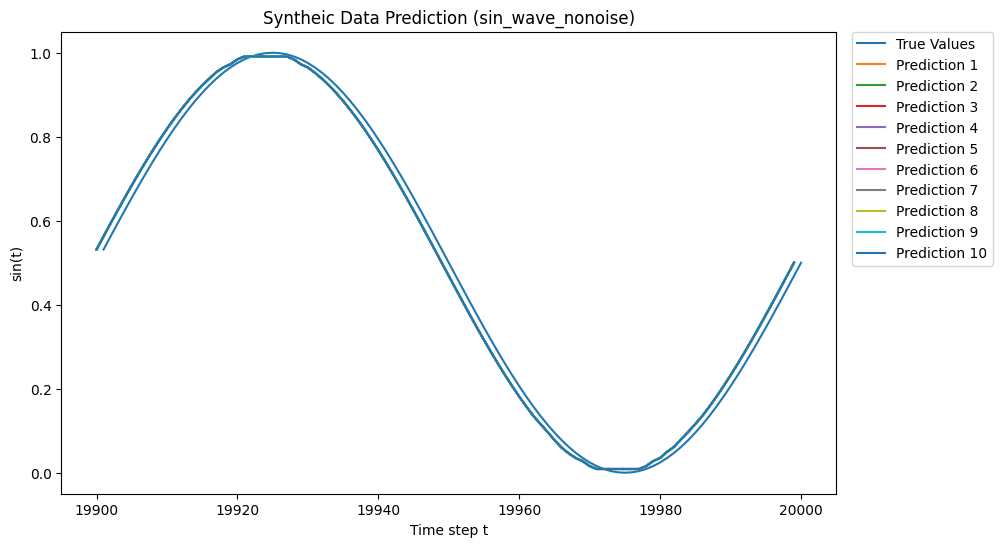

In [19]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

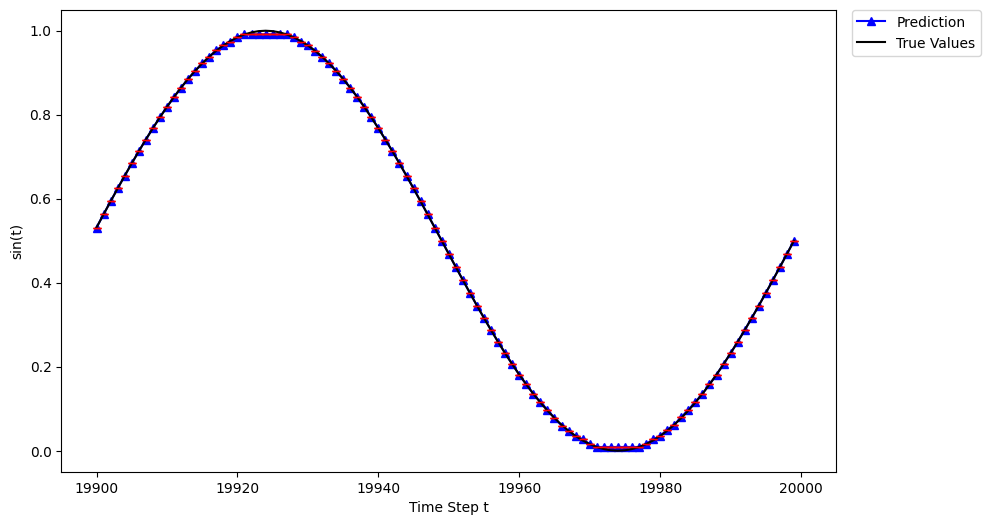

In [20]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [21]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
39901,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
39902,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39903,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39904,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
...,...,...,...,...,...,...,...,...,...,...
39996,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16
39997,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39998,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39999,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16


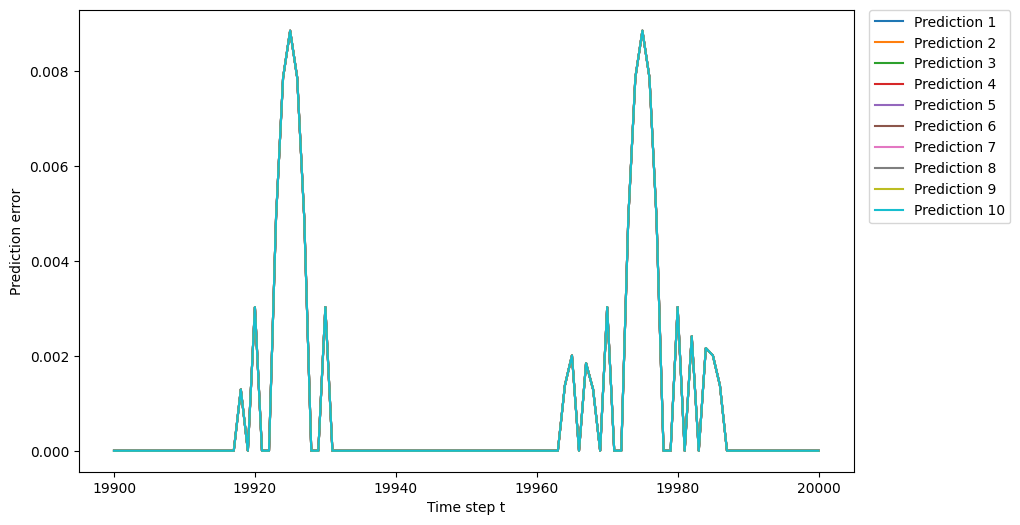

In [22]:
plot_prediction_absolute_error(case1_error_abs_value)

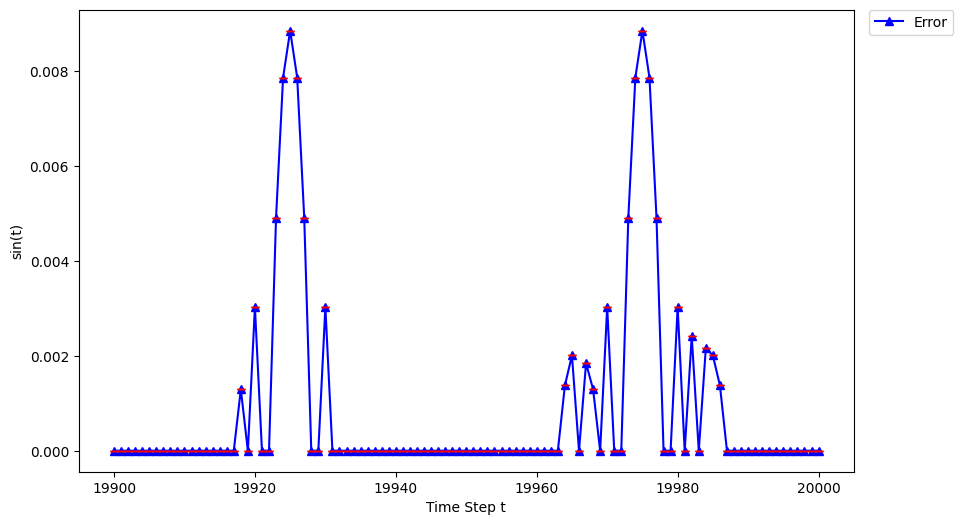

In [23]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [24]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531395,NaN,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,NaN
2,3,0.562667,NaN,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,NaN
3,4,0.593691,NaN,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,NaN
4,5,0.624345,NaN,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,NaN


In [25]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,NaN
39997,19997,NaN,NaN,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,NaN
39998,19998,NaN,NaN,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,NaN
39999,19999,NaN,NaN,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,NaN
40000,20000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [26]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    0.531395
19902    0.562667
19903    0.593691
19904    0.624345
19905    0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 101, dtype: float64

In [27]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.562667,0.531395,0.531395,0.531395
19901,0.575000,0.575000,0.575000,0.575000,0.562667,0.575000,0.562667,0.575000,0.575000,0.562667
19902,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
19903,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345
19904,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508
...,...,...,...,...,...,...,...,...,...,...
19996,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309
19997,0.443667,0.443667,0.443667,0.443667,0.443667,0.443667,0.443667,0.443667,0.443667,0.443667
19998,0.475000,0.475000,0.475000,0.475000,0.475000,0.475000,0.475000,0.475000,0.475000,0.475000
19999,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


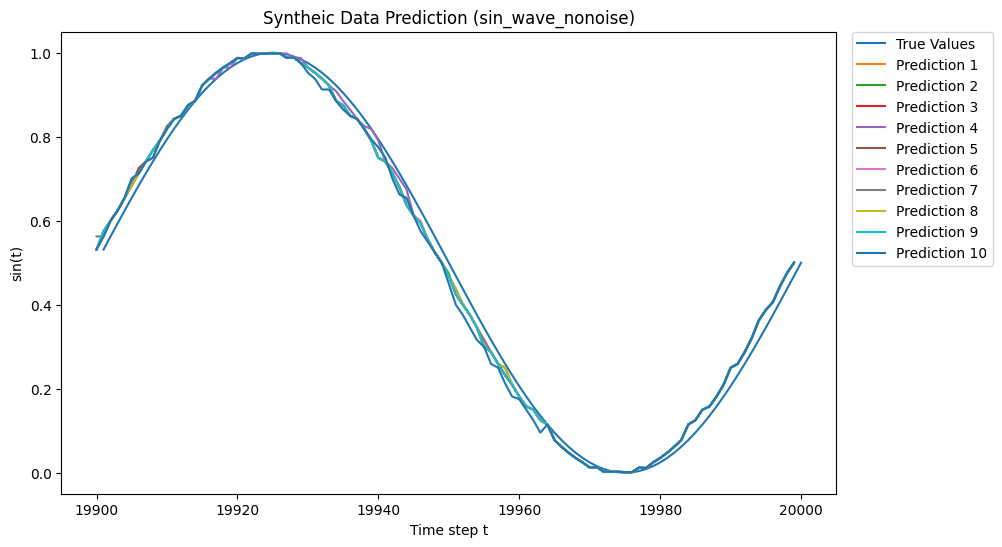

In [28]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

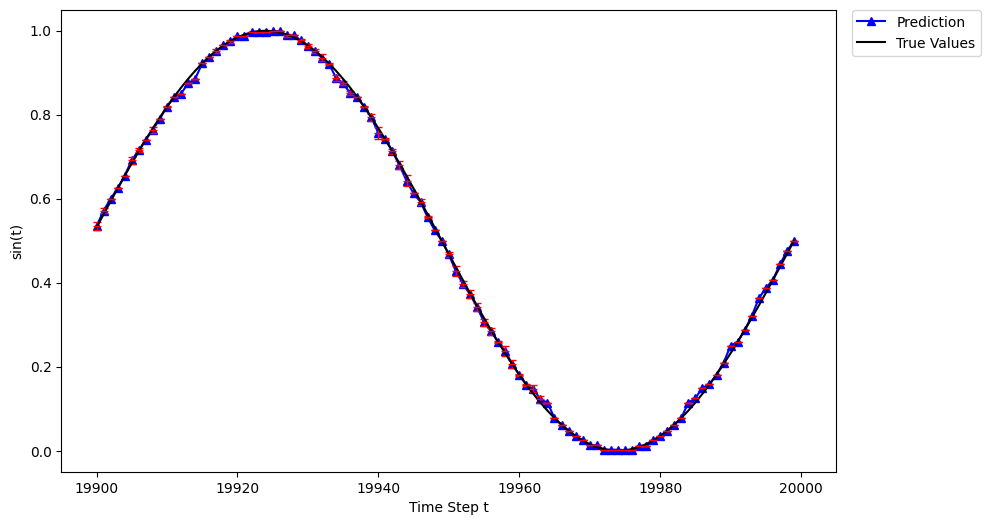

In [29]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [30]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
39901,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,3.127200e-02,1.110220e-16,1.110220e-16,1.110220e-16
39902,1.233300e-02,1.233300e-02,1.233300e-02,1.233300e-02,2.220450e-16,1.233300e-02,2.220450e-16,1.233300e-02,1.233300e-02,2.220450e-16
39903,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03,6.309000e-03
39904,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
...,...,...,...,...,...,...,...,...,...,...
39996,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02,1.184500e-02
39997,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39998,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03,6.333500e-03
39999,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03,6.395000e-03


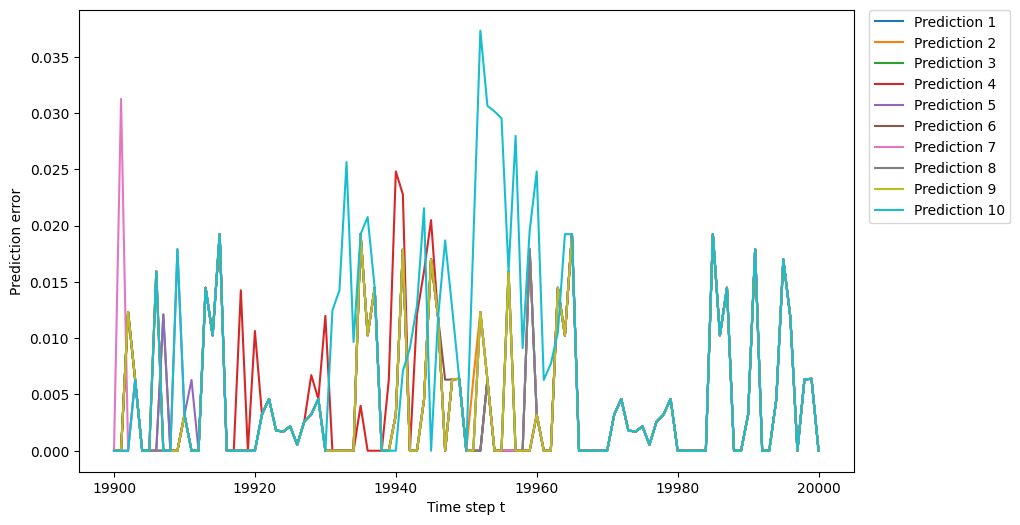

In [31]:
plot_prediction_absolute_error(case2_error_abs_value)

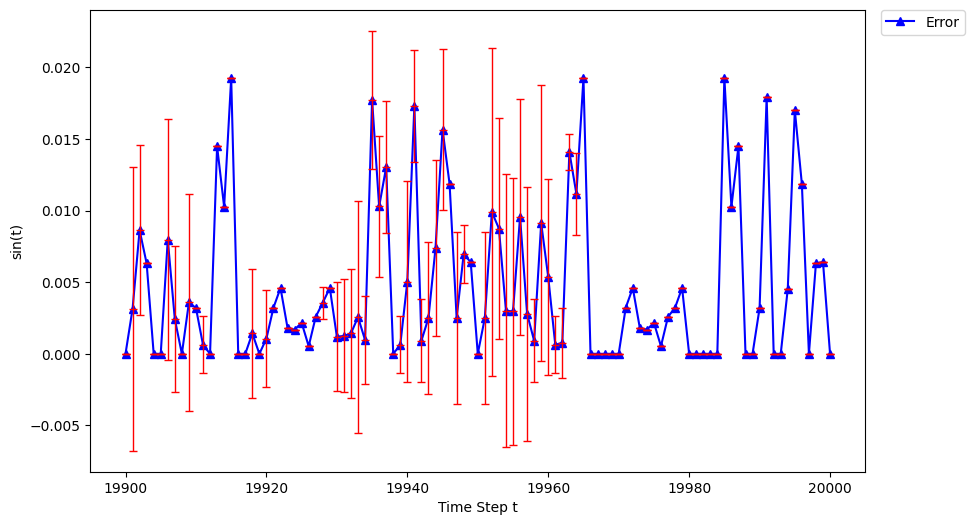

In [32]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [33]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531395,NaN,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,NaN
2,3,0.562667,NaN,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,NaN
3,4,0.593691,NaN,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,NaN
4,5,0.624345,NaN,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,NaN


In [34]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,NaN
39997,19997,NaN,NaN,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,NaN
39998,19998,NaN,NaN,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,NaN
39999,19999,NaN,NaN,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,NaN
40000,20000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [35]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    0.531395
19902    0.562667
19903    0.593691
19904    0.624345
19905    0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 101, dtype: float64

In [36]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395
19901,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667
19902,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691
19903,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345
19904,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508
...,...,...,...,...,...,...,...,...,...,...
19996,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309
19997,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333
19998,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605
19999,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


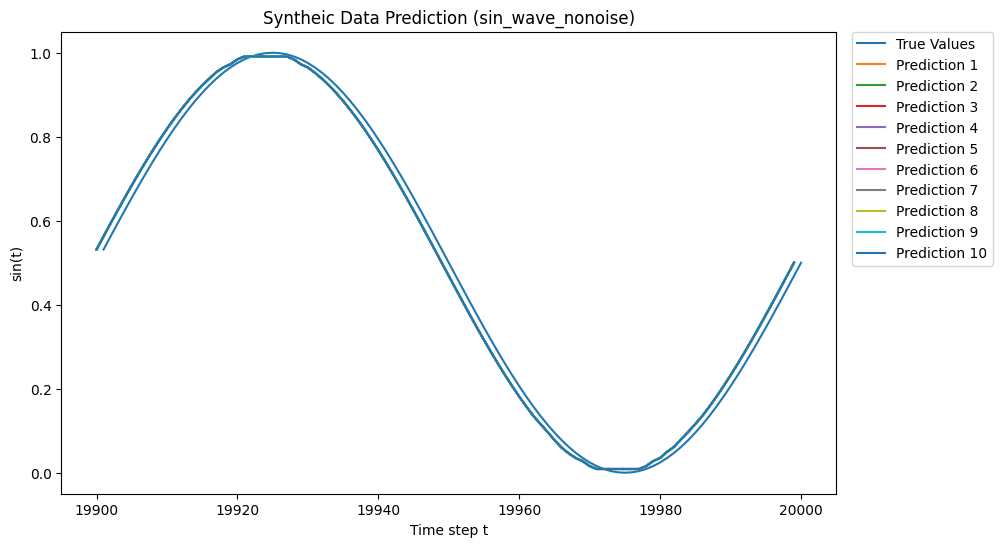

In [37]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

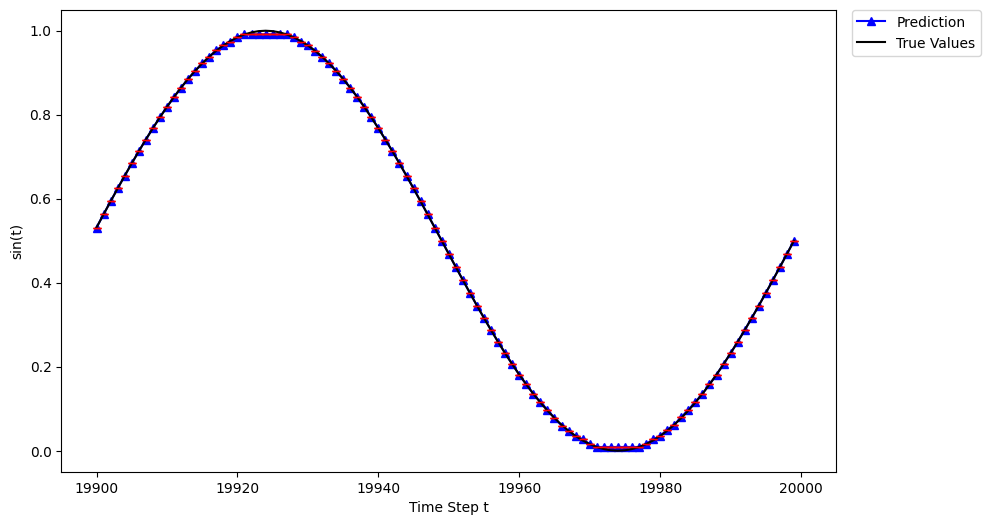

In [38]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [39]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
39901,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
39902,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39903,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39904,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
...,...,...,...,...,...,...,...,...,...,...
39996,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16
39997,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39998,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39999,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16


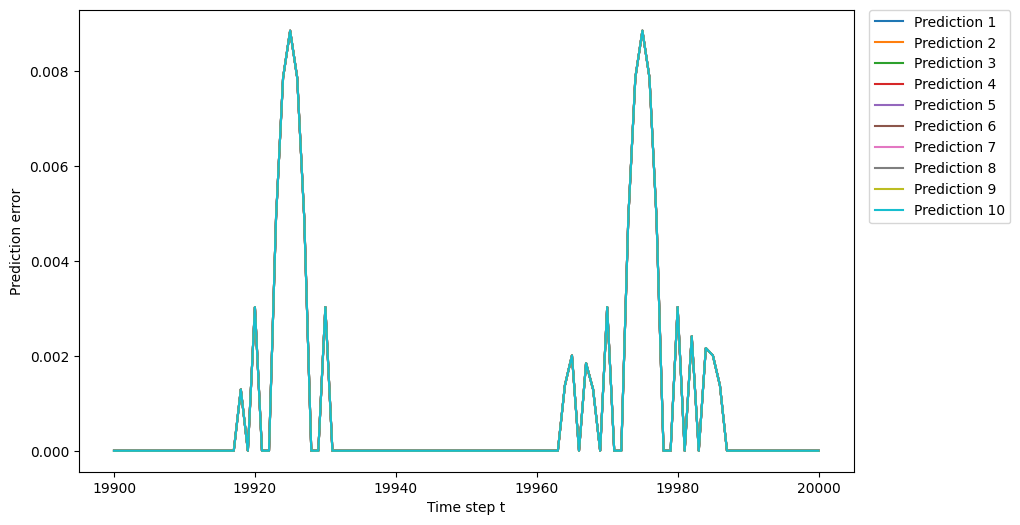

In [40]:
plot_prediction_absolute_error(case3_error_abs_value)

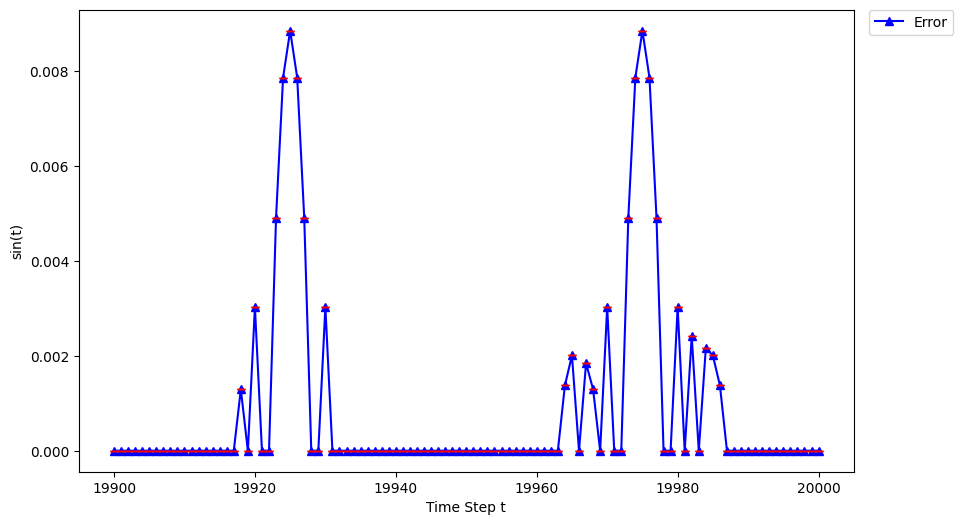

In [41]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [42]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531395,NaN,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,NaN
2,3,0.562667,NaN,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,NaN
3,4,0.593691,NaN,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,NaN
4,5,0.624345,NaN,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,NaN


In [43]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    0.531395
19902    0.562667
19903    0.593691
19904    0.624345
19905    0.654508
           ...   
19997    0.406309
19998    0.437333
19999    0.468605
20000    0.500000
20001         NaN
Name: TRUE, Length: 101, dtype: float64

In [44]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395,0.531395
19901,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667,0.562667
19902,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691,0.593691
19903,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345,0.624345
19904,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508,0.654508
...,...,...,...,...,...,...,...,...,...,...
19996,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309,0.406309
19997,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333,0.437333
19998,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605,0.468605
19999,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


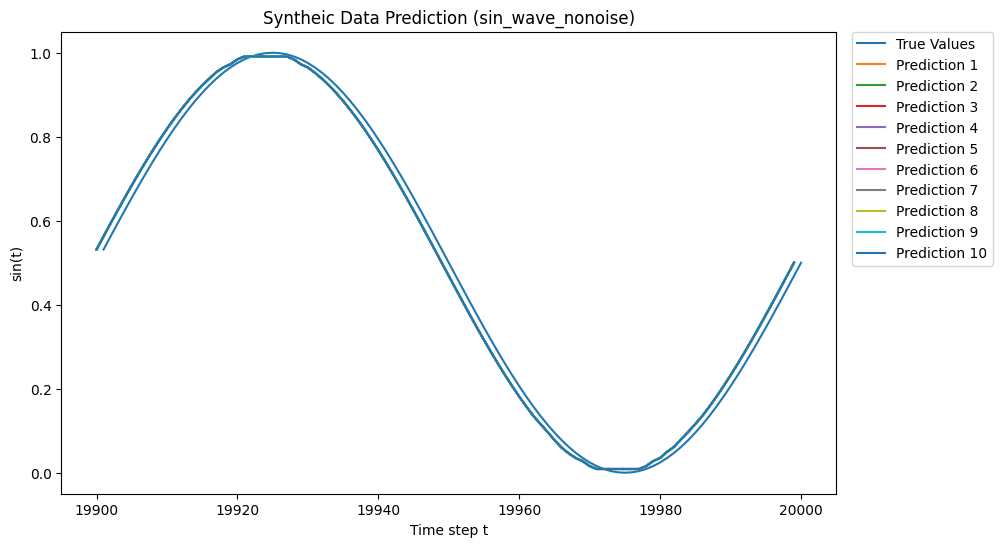

In [45]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

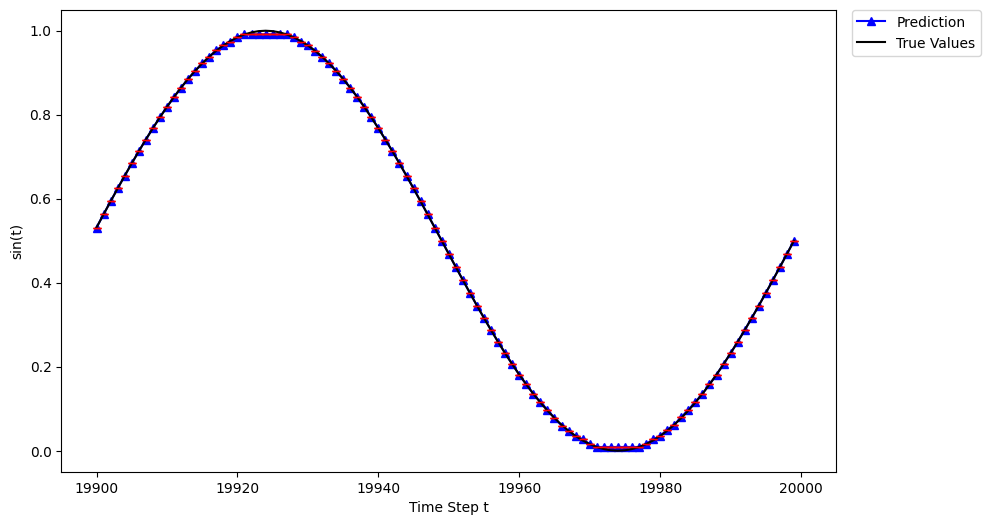

In [46]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [47]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
39901,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
39902,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39903,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16,2.220450e-16
39904,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16,1.110220e-16
...,...,...,...,...,...,...,...,...,...,...
39996,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16
39997,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39998,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17,5.551120e-17
39999,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16,1.665330e-16


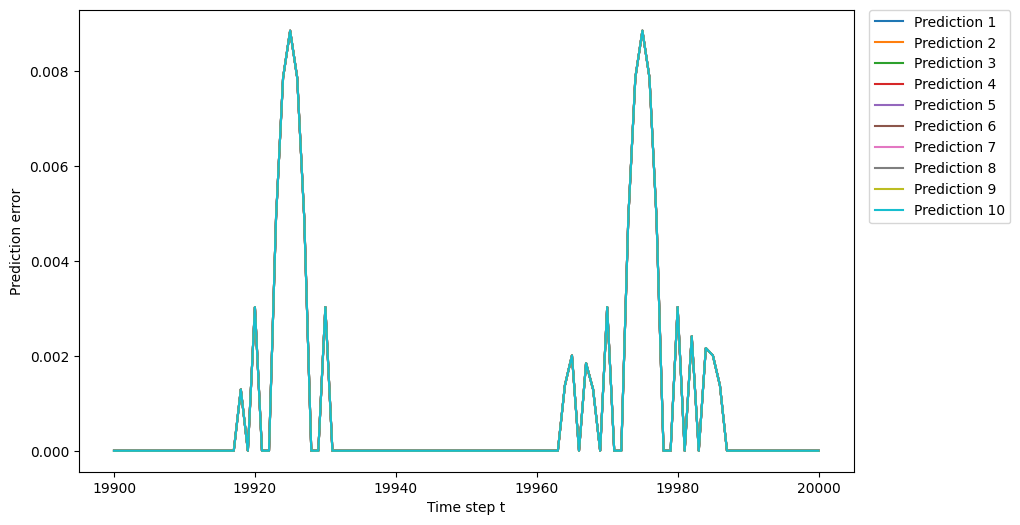

In [48]:
plot_prediction_absolute_error(case4_error_abs_value)

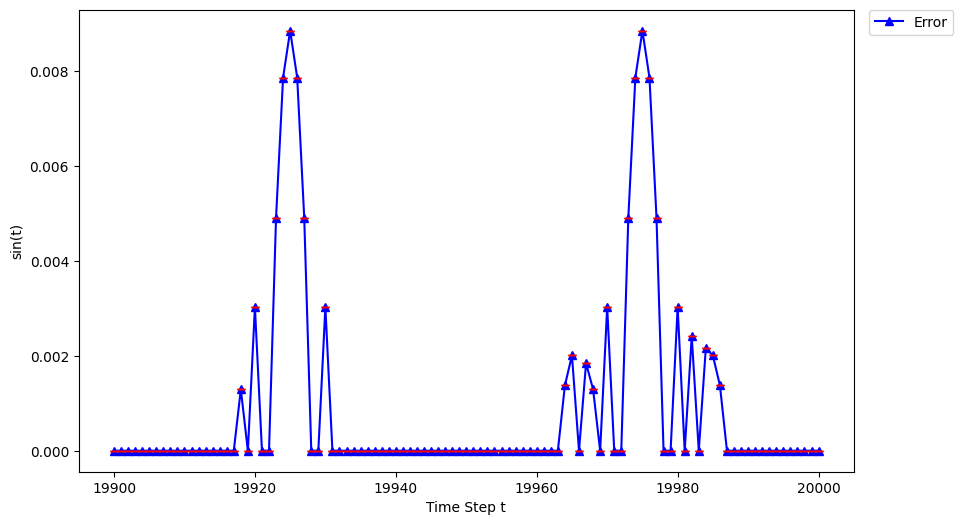

In [49]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [50]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
# case_labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# case_labels = ['Case 1', 'Case 4']
cla_labels = ['CLA(Fit)', 'CLA(Wide)', 'CLA(Narrow)', 'CLA-DR']
# cla_labels = ['CLA(Fit)', 'CLA-DR']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1 / CLA(Fit)
predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2 / CLA(Wide)
predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3 / CLA(Narrow)
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4 / CLA-DR

error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1 / CLA(Fit)
error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2 / CLA(Wide)
error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3 / CLA(Narrow)
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4 / CLA-DR

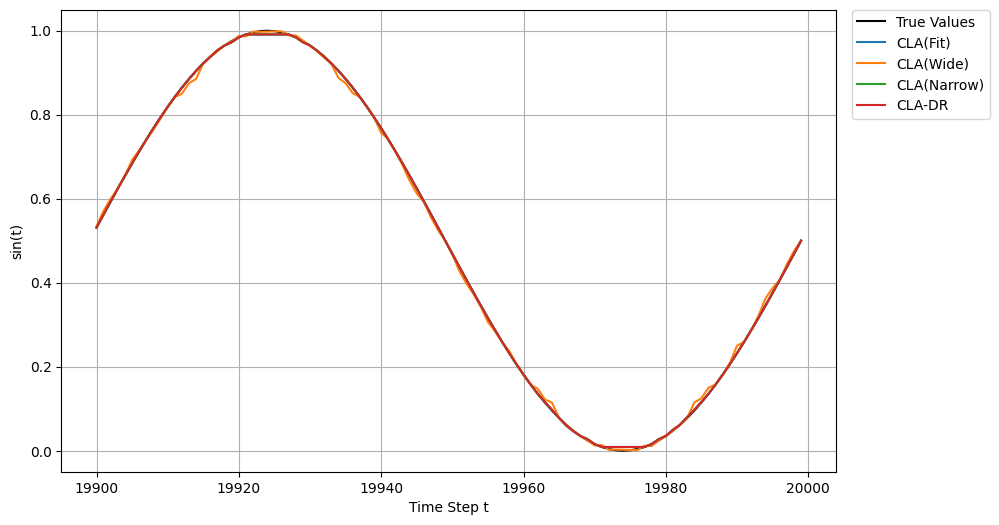

In [51]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
# plot_syntheic_load_list_by_mean_std_with_case_labels(true_values, predicted_values_list, labels=case_labels, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_cla_labels(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval)

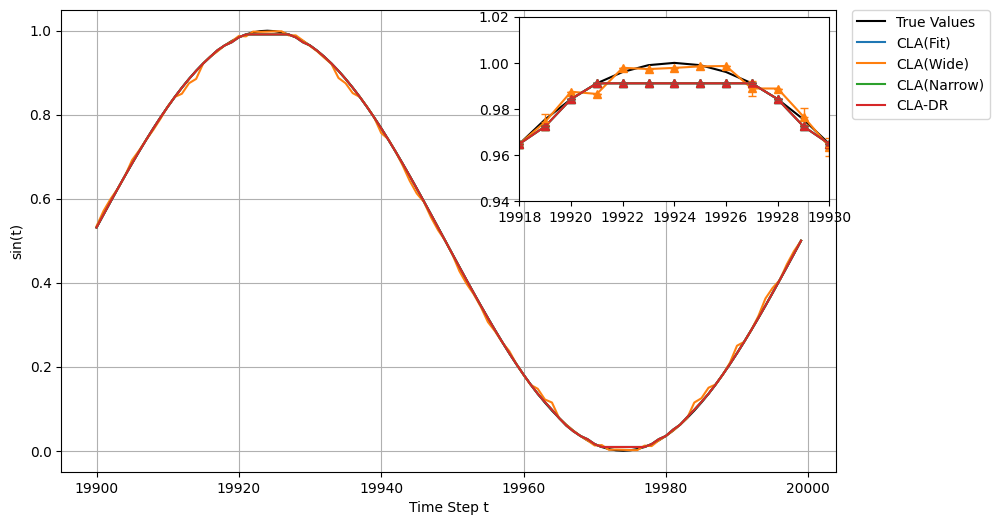

In [52]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_syntheic_load_list_by_mean_std_with_case_labels_and_zoom(true_values, predicted_values_list, labels=case_labels, sampling_interval=config.sampling_interval, zoom_coords=zoom_coords)
plot_syntheic_load_list_by_mean_std_with_cla_labels_and_zoom(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords_max)

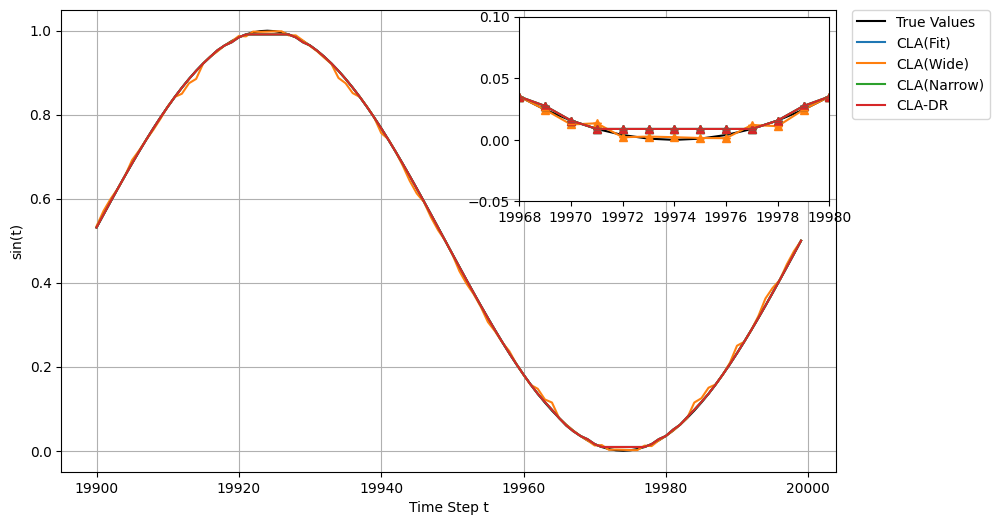

In [53]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_syntheic_load_list_by_mean_std_with_case_labels_and_zoom(true_values, predicted_values_list, labels=case_labels, sampling_interval=config.sampling_interval, zoom_coords=zoom_coords)
plot_syntheic_load_list_by_mean_std_with_cla_labels_and_zoom(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords_min)

In [54]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
# plot_prediction_absolute_error_list_by_mean_std_with_case_labels(error_abs_value_list, labels=case_labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)